## Working withGgeohash in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/12_geohash.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/12_geohash.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/12_geohash.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/12_geohash.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2geohash

In [2]:
from vgrid.conversion.latlon2dggs import latlon2geohash

lat = 10.775276
lon = 106.706797
res = 6
geohash_id = latlon2geohash(lat, lon, res)
geohash_id

'w3gvk1'

### Geohash to Polygon

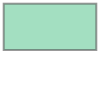

In [3]:
from vgrid.conversion.dggs2geo.geohash2geo import geohash2geo

geohash_geo = geohash2geo(geohash_id)
geohash_geo

### Geohash to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.geohash2geo import geohash2geojson

geohash_geojson = geohash2geojson(geohash_id)
# geohash_geojson

### Vector to Geohash

Processing features: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


<Axes: >

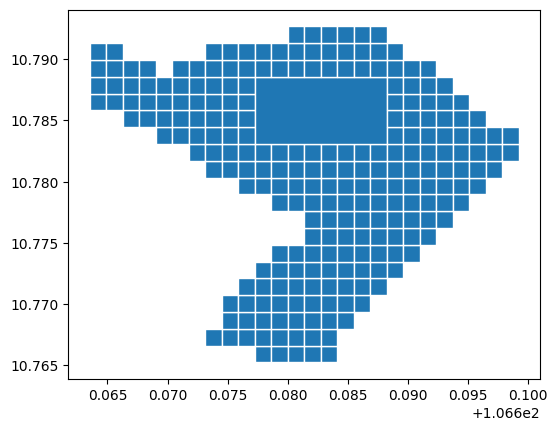

In [1]:
from vgrid.conversion.vector2dggs.vector2geohash import vector2geohash

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
vector_to_geohash = vector2geohash(
    file_path,
    resolution=7,
    compact=True,
    topology=True,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output
vector_to_geohash.plot(edgecolor="white")

### Geohash Compact

<Axes: >

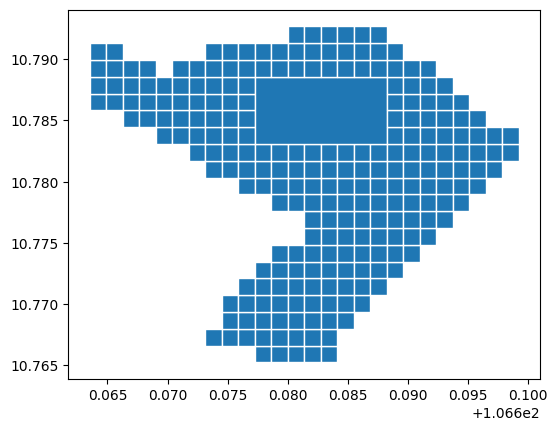

In [2]:
from vgrid.conversion.dggscompact.geohashcompact import geohashcompact

geohash_compacted = geohashcompact(
    vector_to_geohash, geohash_id="geohash", output_format="gpd"
)
geohash_compacted.plot(edgecolor="white")

### Geohash Expand

<Axes: >

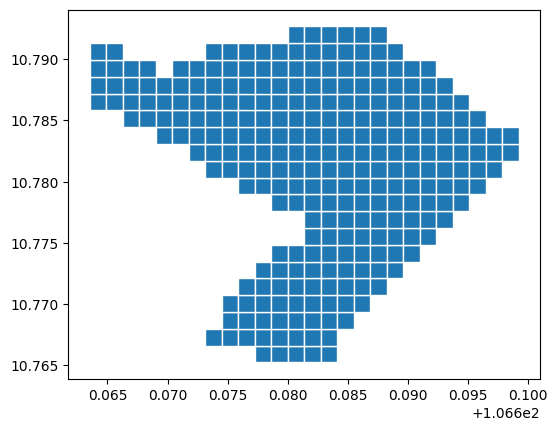

In [3]:
from vgrid.conversion.dggscompact.geohashcompact import geohashexpand

geohash_expanded = geohashexpand(vector_to_geohash, resolution=7, output_format="gpd")
geohash_expanded.plot(edgecolor="white")

### Geohash Binning

Generating Geohash DGGS: 100%|██████████| 744/744 [00:00<00:00, 12166.08 cells/s]


<Axes: >

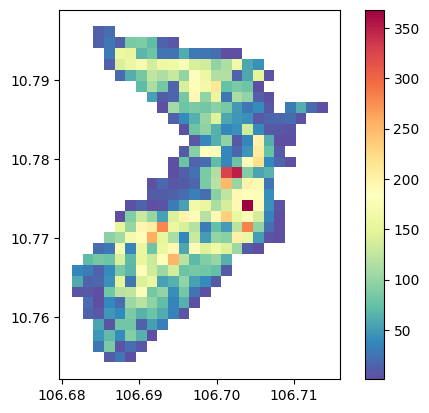

In [8]:
from vgrid.binning.geohashbin import geohashbin

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
geohash_bin = geohashbin(
    file_path,
    resolution=7,
    stats=stats,
    # numeric_field="confidence",
    # category="category",
    output_format="gpd",
)
geohash_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to Geohash

#### Download and open raster

rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


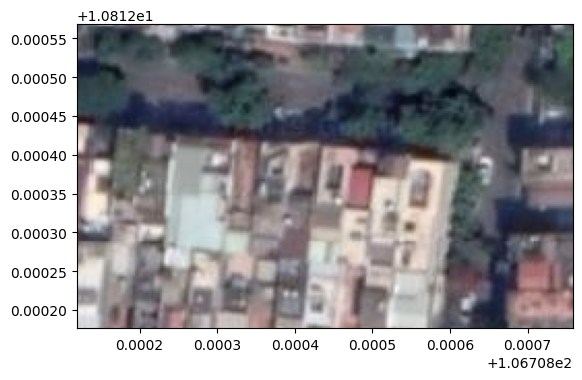

<Axes: >

In [1]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to Geohash

In [10]:
# %pip install folium

In [2]:
from vgrid.conversion.raster2dggs.raster2geohash import raster2geohash

raster_to_geohash = raster2geohash(raster_file, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

geohash_layer = folium.GeoJson(
    raster_to_geohash,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["geohash", "band_1", "band_2", "band_3"],
        aliases=["Geohash ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(geohash_layer.get_bounds())

# Display the map
m

Cell size: 0.08638527081938627 m2
Nearest geohash resolution determined: 10


Converting raster to Geohash: 100%|██████████| 4380/4380 [00:00<00:00, 22380.30 cells/s]


### Geohash Generator

Generating Geohash DGGS: 100%|██████████| 180/180 [00:00<00:00, 6404.50 cells/s]


<Axes: >

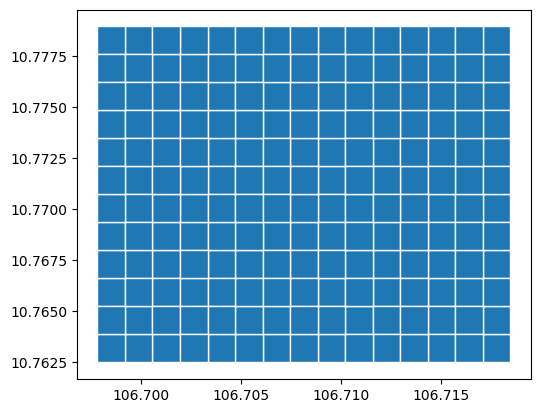

In [12]:
from vgrid.generator.geohashgrid import geohashgrid

# geohash_grid = geohashgrid(resolution=1,output_format="gpd")
geohash_grid = geohashgrid(
    resolution=7,
    bbox=[106.699007, 10.762811, 106.717674, 10.778649],
    output_format="gpd",
)
geohash_grid.plot(edgecolor="white")

### Geohash Inspect

In [1]:
from vgrid.stats.geohashstats import geohashinspect

resolution = 3
geohash_inspect = geohashinspect(resolution)
geohash_inspect.head()

Generating Geohash DGGS: 100%|██████████| 32768/32768 [00:02<00:00, 14171.03 cells/s]


geohash  resolution  center_lat  center_lon     cell_width    cell_height  \
0     1rz           3  -45.703125 -113.203125  108131.362462  156298.383490   
1     h3j           3  -83.671875   18.984375   15394.637692  157050.292252   
2     n1m           3  -82.265625   97.734375   19225.556881  157040.827204   
3     ck2           3   69.609375 -123.046875   56502.699442  156877.037096   
4     pcm           3  -82.265625  176.484375   19225.556881  157040.827204   

      cell_area  cell_perimeter  \
0  1.711594e+10   531605.099750   
1  2.718492e+09   348720.779077   
2  3.319000e+09   356351.878996   
3  8.580812e+09   423150.545233   
4  3.319000e+09   356351.878996   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-113.90625 -46.40625, -112.5 -46.406...    False   1.099574   
1  POLYGON ((18.28125 -84.375, 19.6875 -84.375, 1...    False   0.174643   
2  POLYGON ((97.03125 -82.96875, 98.4375 -82.9687...    False   0.213222   
3  POLYGON ((-123.75 68.90625, -122.34375 68.9062...    False   0.551255   
4  POLYGON ((175.78125 -82.96875, 177.1875 -82.96...    False   0.213222   

        ipq       zsc  cvh  
0  0.761084  0.872386  1.0  
1  0.280920  0.530017  1.0  
2  0.328442  0.573097  1.0  
3  0.602211  0.776016  1.0  
4  0.328442  0.573097  1.0

### Geohash Normalized Area Histogram

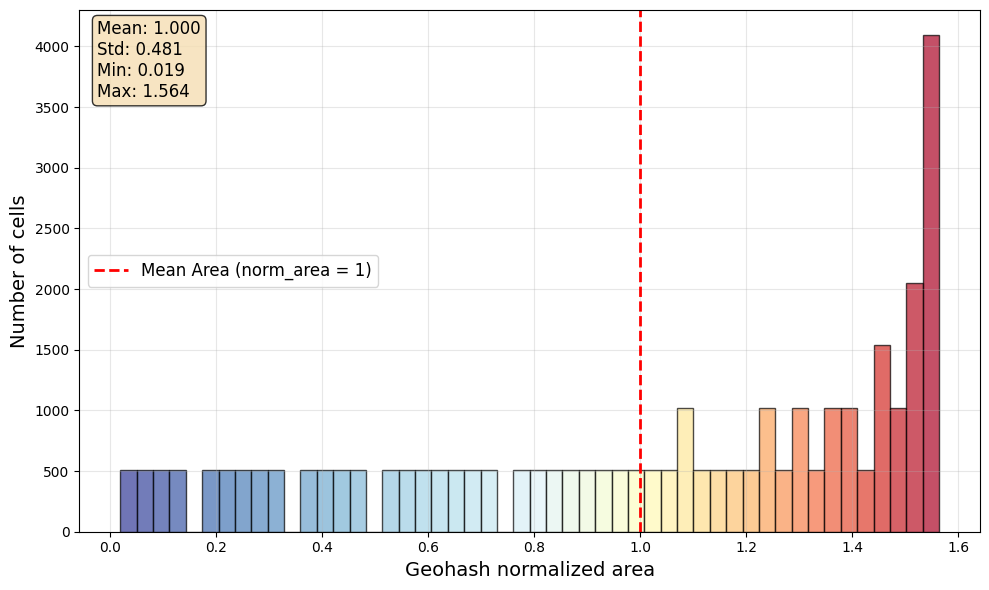

In [2]:
from vgrid.stats.geohashstats import geohash_norm_area_hist

geohash_norm_area_hist(geohash_inspect)

### Distribution of Geohash Area Distortions

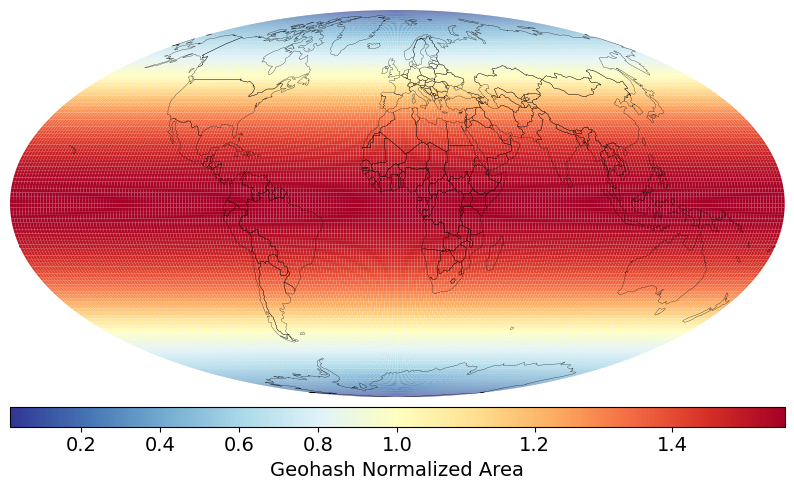

In [3]:
from vgrid.stats.geohashstats import geohash_norm_area

geohash_norm_area(geohash_inspect)

### Geohash IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

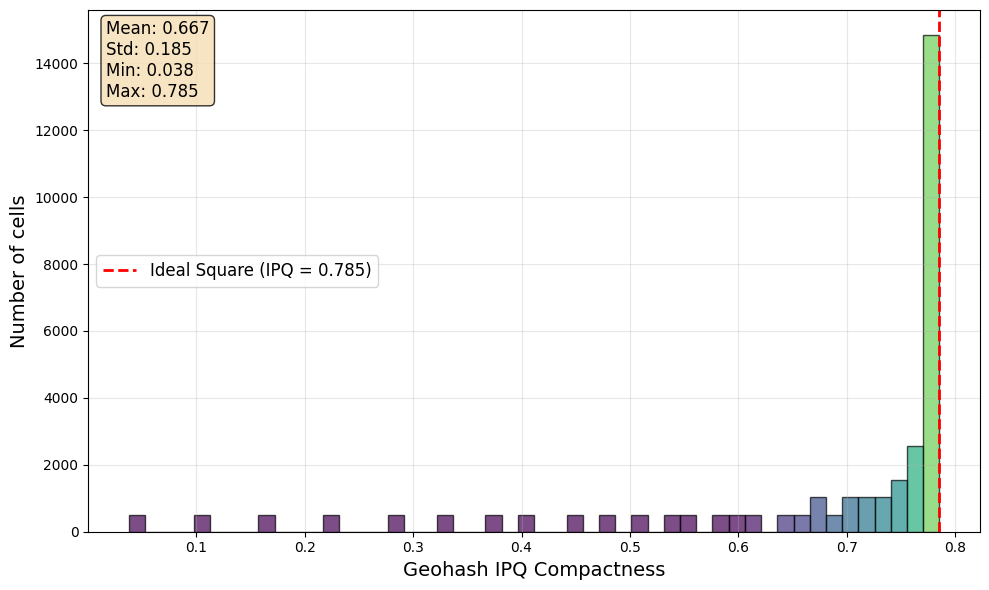

In [4]:
from vgrid.stats.geohashstats import geohash_compactness_ipq_hist

geohash_compactness_ipq_hist(geohash_inspect)

### Distribution of Geohash IPQ Compactness

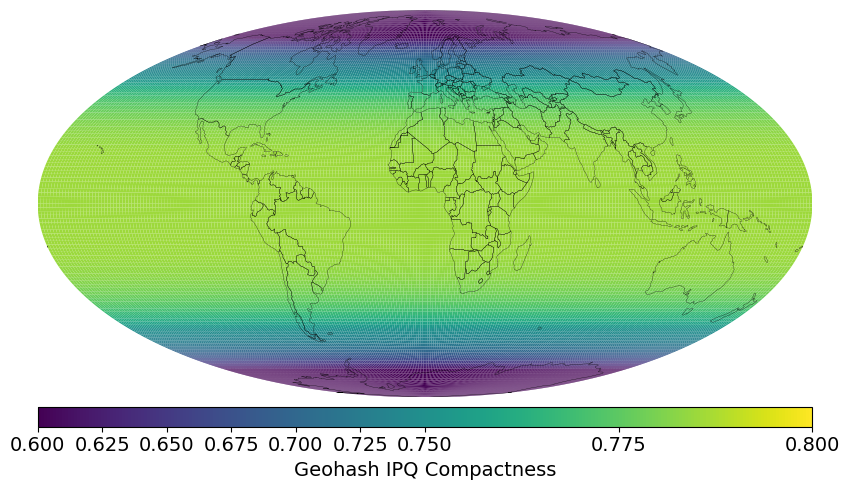

In [5]:
from vgrid.stats.geohashstats import geohash_compactness_ipq

geohash_compactness_ipq(geohash_inspect)

### Geohash Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

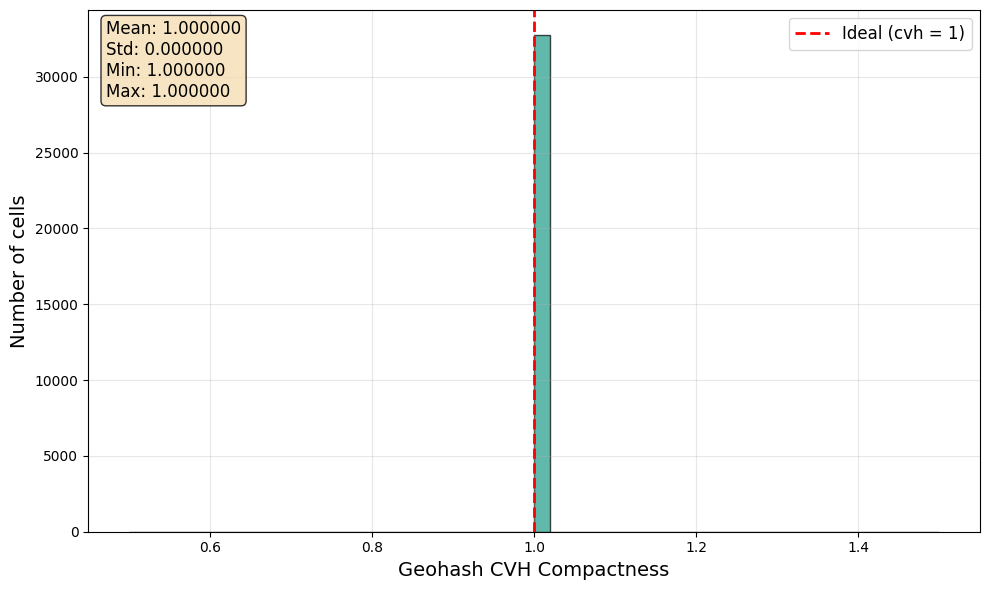

In [6]:
from vgrid.stats.geohashstats import geohash_compactness_cvh_hist

geohash_compactness_cvh_hist(geohash_inspect)

### Distribution of Geohash Convex hull Compactness

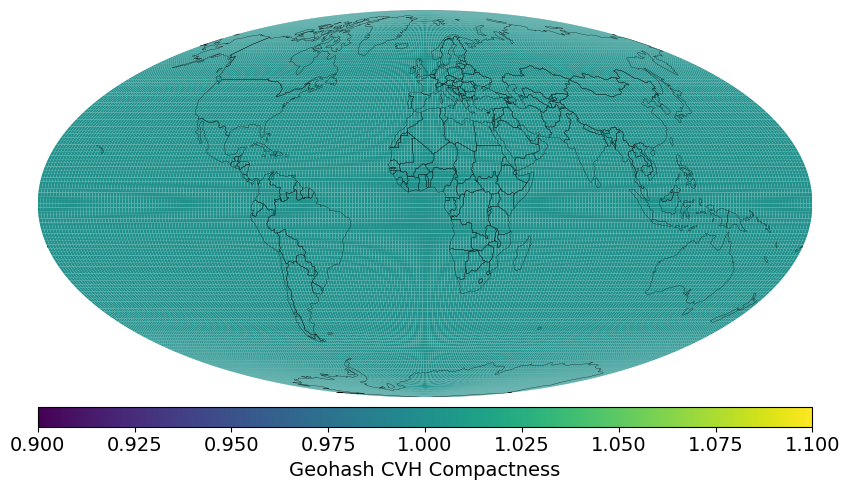

In [7]:
from vgrid.stats.geohashstats import geohash_compactness_cvh

geohash_compactness_cvh(geohash_inspect)

### Geohash Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [9]:
from vgrid.stats import geohashstats

geohashstats()

resolution      number_of_cells  avg_edge_len_m  avg_cell_area_m2  \
0            1                   32    3.992437e+06      1.593955e+13   
1            2                 1024    7.057698e+05      4.981110e+11   
2            3                32768    1.247636e+05      1.556597e+10   
3            4              1048576    2.205531e+04      4.864365e+08   
4            5             33554432    3.898864e+03      1.520114e+07   
5            6           1073741824    6.892283e+02      4.750356e+05   
6            7          34359738368    1.218395e+02      1.484486e+04   
7            8        1099511627776    2.153838e+01      4.639020e+02   
8            9       35184372088832    3.807484e+00      1.449694e+01   
9           10     1125899906842624    6.730745e-01      4.530293e-01   
10          11    36028797018963968    1.189839e-01      1.415716e-02   
11          12  1152921504606846976    2.103358e-02      4.424114e-04   

           cls_m  
0   4.528782e+06  
1   7.965056e+05  
2   1.407814e+05  
3   2.488675e+04  
4   4.399397e+03  
5   7.777108e+02  
6   1.374812e+02  
7   2.430346e+01  
8   4.296286e+00  
9   7.594832e-01  
10  1.342589e-01  
11  2.373385e-02